In [33]:
%%javascript
<!-- Ignore this block -->
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [34]:
%config InlineBackend.figure_format = 'retina'

from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sample dataset
We will sample the dataset using normal distribution µ =1 and σ = 0.05.<br>
y is generated using 1.3x<sup>2</sup> + 4.8x + 8 + e

In [35]:
"""Sample features for the dataset"""
x = np.random.uniform(0.913397, 1.08660, size = (100, 1))

"""Generate target. Here target is given by 1.3x^2 + 4.8x + 8 + e"""
x = sorted(x)
func = np.vectorize(lambda x: (1.3 * (x * x)) + (4.8 * x) + 8)
y = func(x)
e = np.random.rand(100, 1)
y = y + e

In [36]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y,
                                                test_size=0.2)

print("Train set size " +str(len(xTrain)))
print("Test set size " +str(len(xTest)))

Train set size 80
Test set size 20


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
trainingPipeline = Pipeline([
    ("polynomialFeatures", PolynomialFeatures()),
    ("featureScaling", StandardScaler()),
    ("regression", LinearRegression())
])


pipelineParameters = {"polynomialFeatures__include_bias":False}

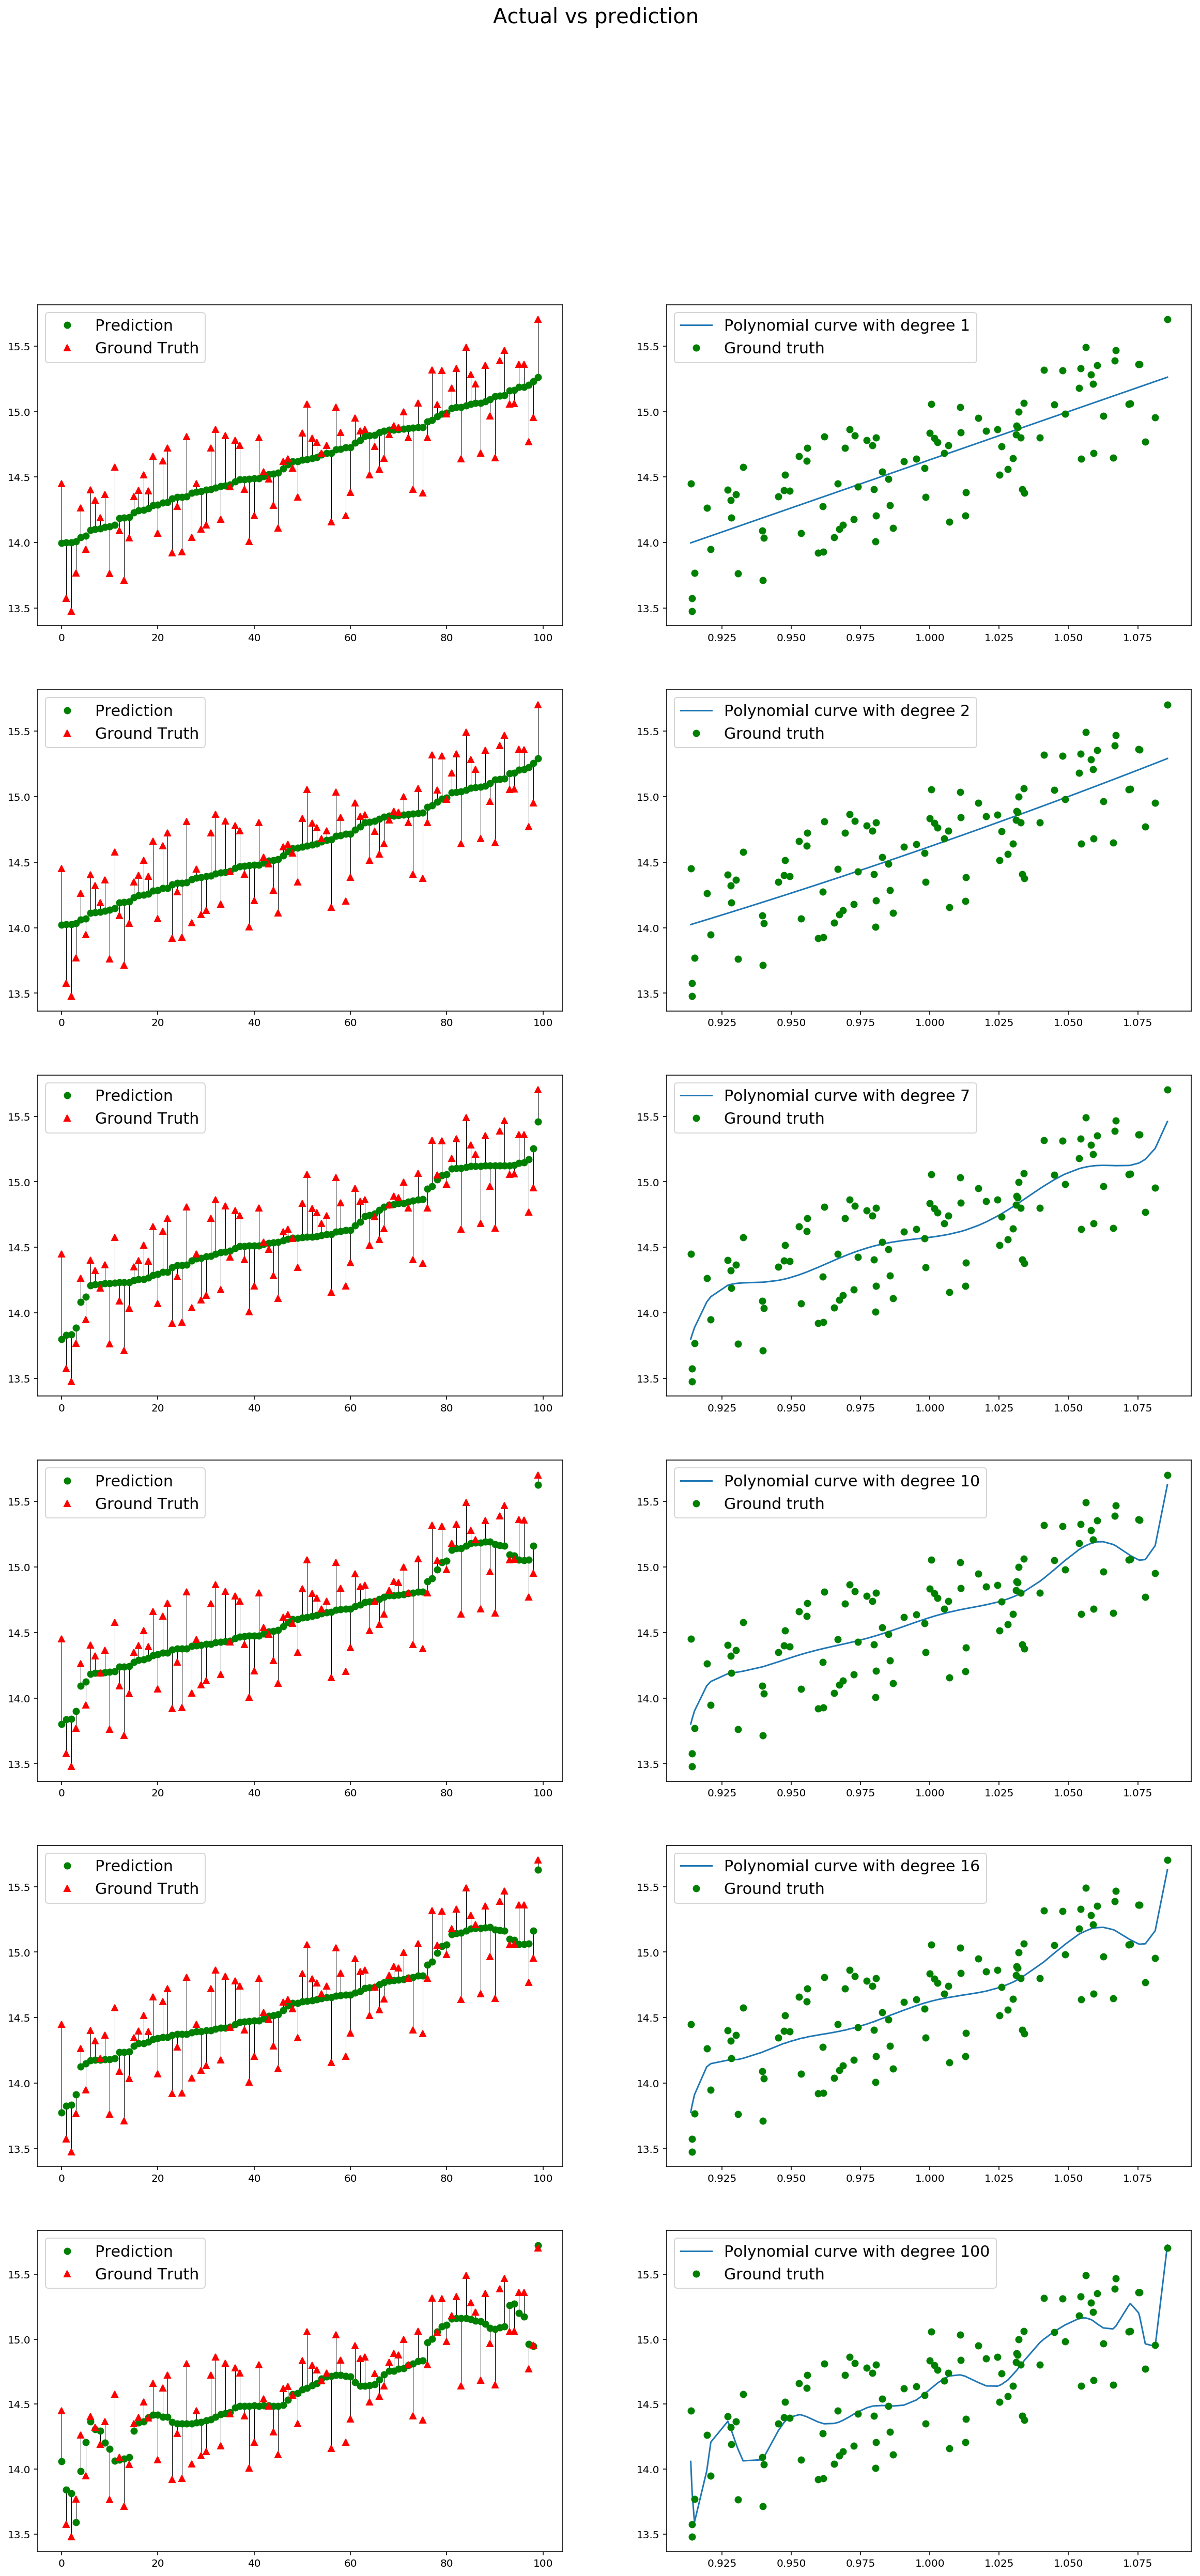

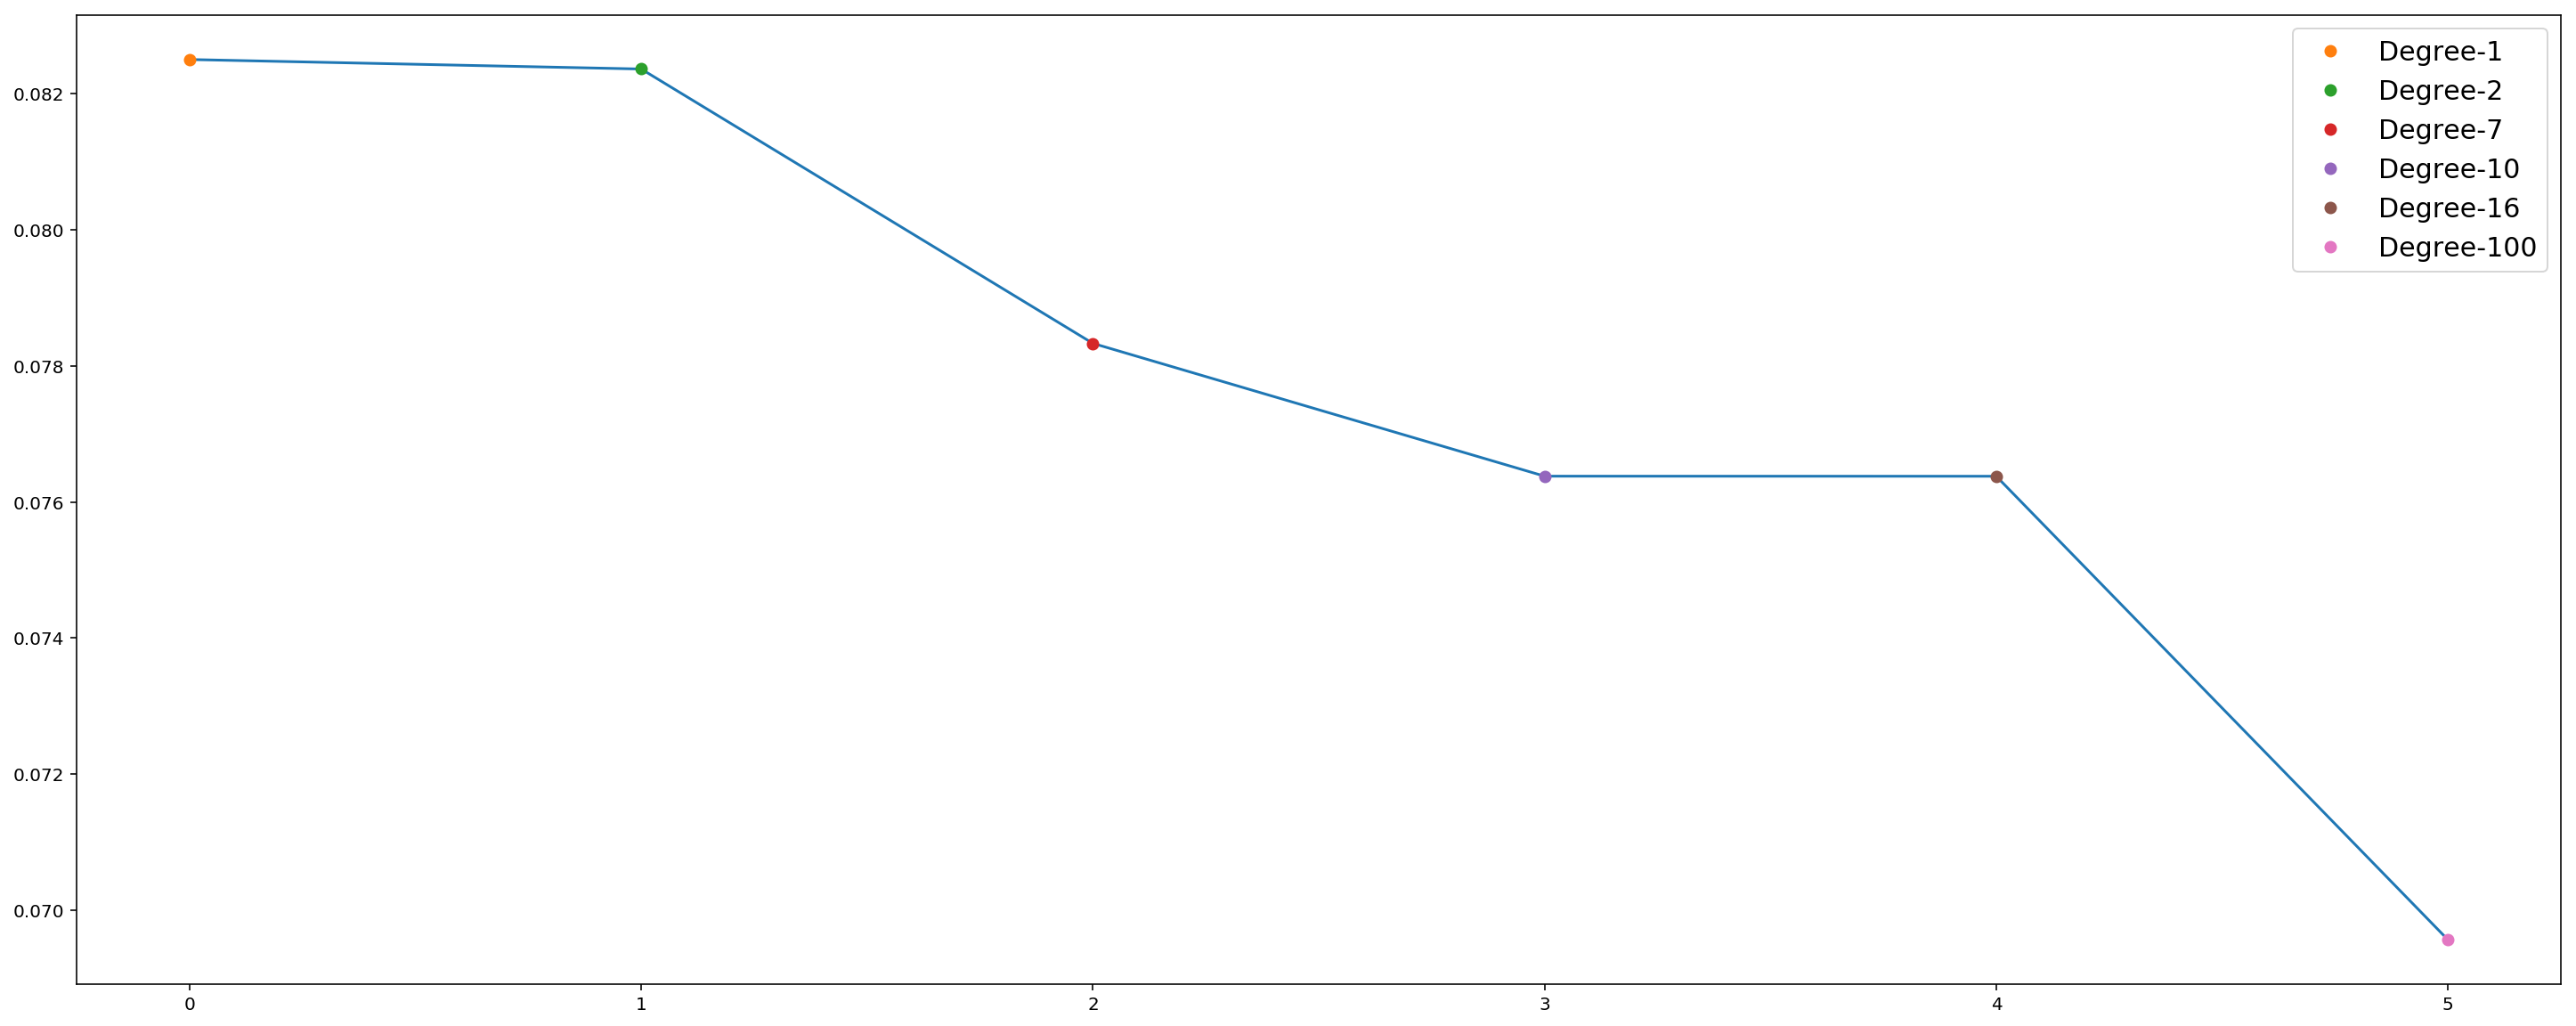

In [38]:
degrees = [1, 2, 7, 10, 16, 100]
fig, axs = plt.subplots(6, 2, figsize=(20, 40))
axs = axs.flatten()
index = 0

mseNoReg = []
fig.suptitle("Actual vs prediction", fontsize = 20)

for degree in degrees:
    pipelineParameters['polynomialFeatures__degree'] = degree
    trainingPipeline.set_params(** pipelineParameters)
    
    trainingPipeline.fit(x, y)
    yPrediction = trainingPipeline.predict(x)
    
    #axs[index].plot(yPrediction,y)
    #axs[index].plot(yPrediction, "ro", label = "Prediction")    
    #axs[index].plot(y, "gx", label = "Actual")
    #axs[index].legend()
    
    for i in range(len(yPrediction)):
        axs[index].plot([i,i],[y[i], yPrediction[i]], c = "k", linewidth=0.5)
        
    axs[index].plot(yPrediction, 'o', label='Prediction', color = 'g')
    axs[index].plot(y,'^' , label='Ground Truth', color = 'r' )
    axs[index].legend(prop={'size': 15})
    
    axs[index + 1].plot(x, yPrediction, label = "Polynomial curve with degree "+str(degree))
    axs[index + 1].plot(x, y, "go", label = "Ground truth")
    axs[index+1].legend(prop={'size': 15})
    index = index + 2
    mseNoReg.append(mean_squared_error(y, yPrediction))
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(25, 10))

axs.plot(mseNoReg)
index = 0
for data, label in zip(mseNoReg, degrees):
    axs.plot(index, data, "o", label = "Degree-" + str(label))
    index = index + 1
axs.legend(prop={'size': 15})
plt.show()

As we make model more complex the error is decreasing as it better fits the training set. It is evident from the above graph. However it is not a good practice to train more complex model as it may overfit. To get a best model that performs good on train and test set, regularization should be used. Furthermore we can see as the degree of the polynomial increases the graph becomes complex.

In [39]:
from sklearn.linear_model import Ridge

trainingPipeline = Pipeline([
    ("polynomialFeatures", PolynomialFeatures()),
    ("featureScaling", StandardScaler()),
    ("regression", Ridge())
])


pipelineParameters = {"polynomialFeatures__include_bias":False}

/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.44756362514e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


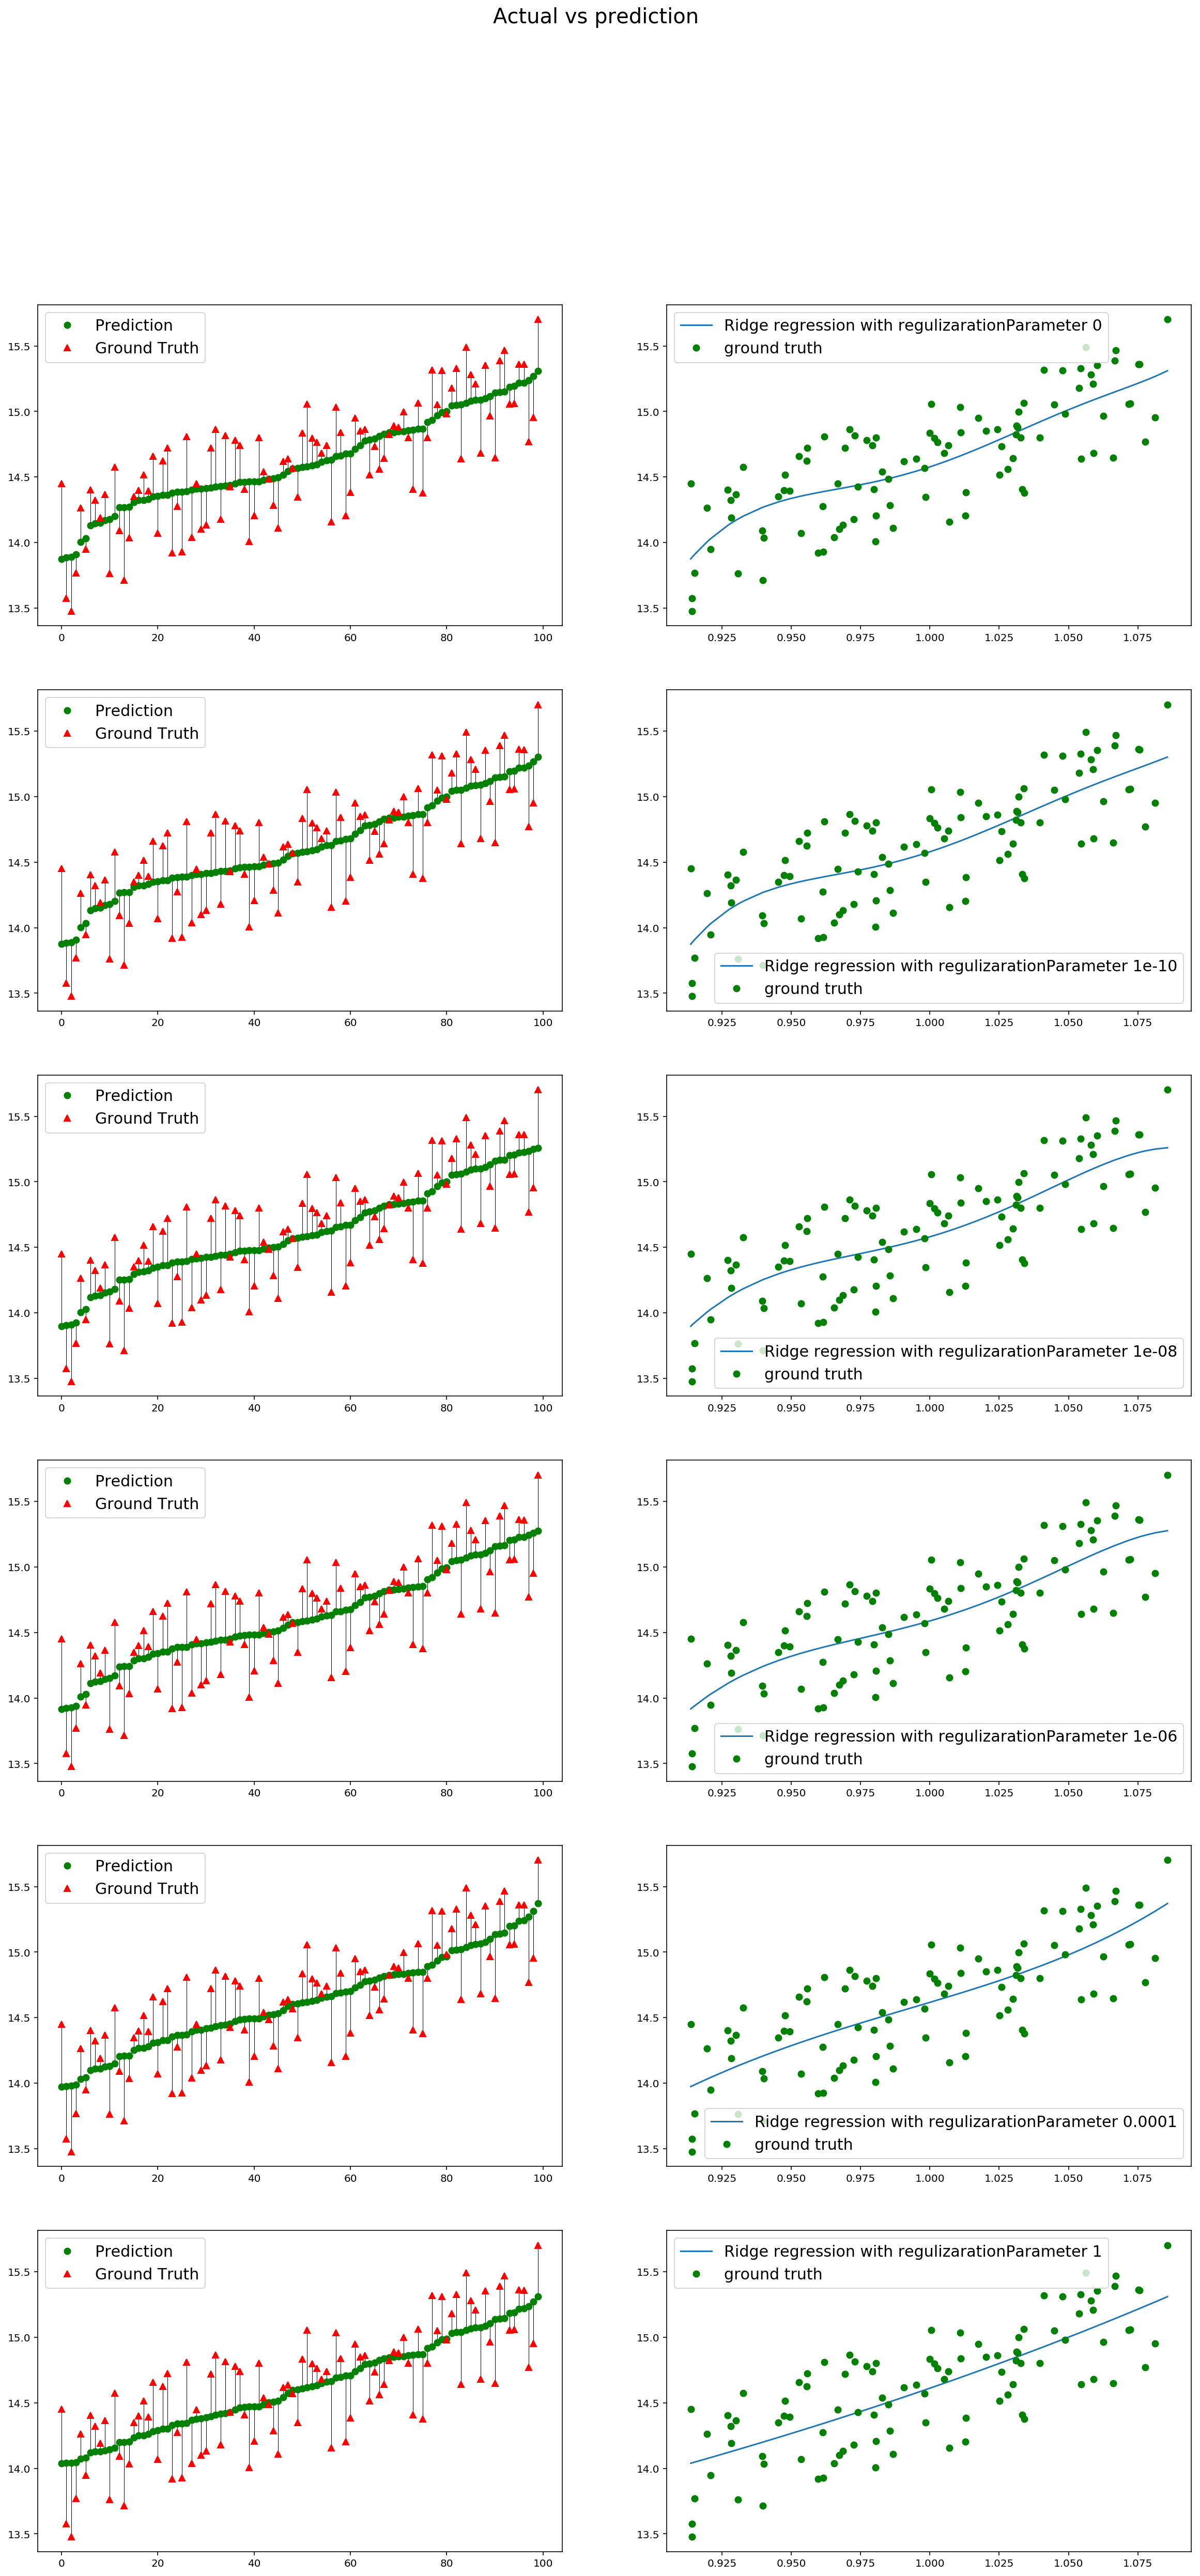

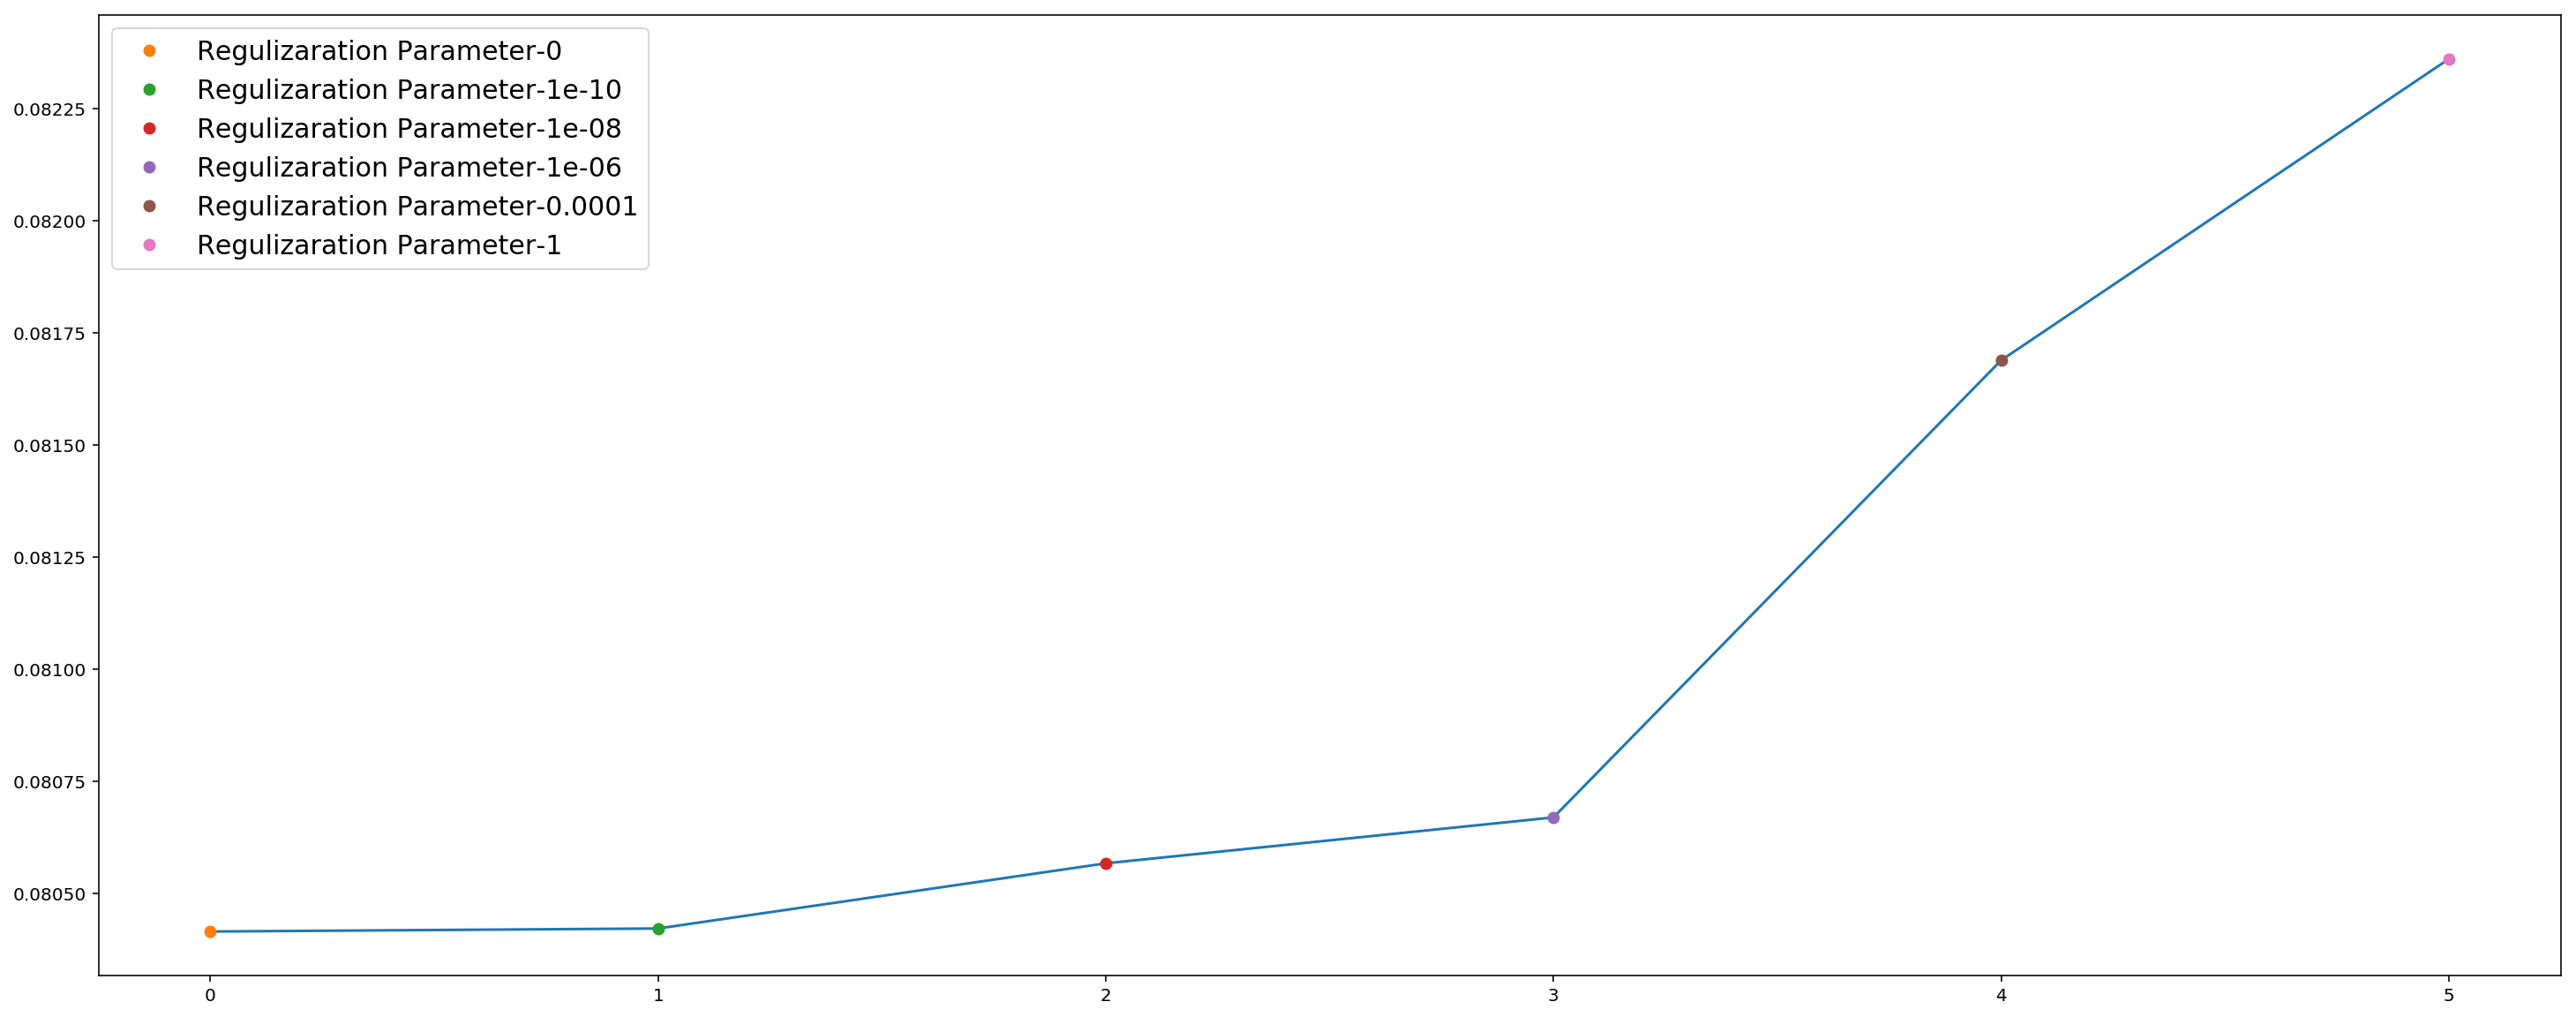

In [40]:
degree = 10
regParameters = [0, 1e-10, 1e-8, 1e-6, 1e-4, 1]

fig, axs = plt.subplots(6, 2, figsize=(20, 40))
axs = axs.flatten()
index = 0

mseReg = []
fig.suptitle("Actual vs prediction", fontsize = 20)

for regParameter in regParameters:
    pipelineParameters['polynomialFeatures__degree'] = degree
    pipelineParameters['regression__alpha'] = regParameter
    
    trainingPipeline.set_params(** pipelineParameters)
    
    trainingPipeline.fit(x, y)
    yPrediction = trainingPipeline.predict(x)
        
    for i in range(len(yPrediction)):
        axs[index].plot([i,i],[y[i], yPrediction[i]], c = "k", linewidth=0.5)
        
    axs[index].plot(yPrediction, 'o', label='Prediction', color = 'g')
    axs[index].plot(y,'^' , label='Ground Truth', color = 'r' )
    axs[index].legend(prop={'size': 15})
    
    axs[index + 1].plot(x, yPrediction,
                        label = "Ridge regression with regulizarationParameter "+str(regParameter))

    axs[index + 1].plot(x, y, "go",
                        label = "ground truth")
    
    axs[index + 1].legend(prop={'size': 15})
    index = index + 2
    mseReg.append(mean_squared_error(y, yPrediction))
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(25, 10))

axs.plot(mseReg)
index = 0
for data, label in zip(mseReg, regParameters):
    axs.plot(index, data, "o", label = "Regulizaration Parameter-" + str(label))
    index = index + 1
axs.legend(prop={'size': 15})
plt.show()

We can see that the model performs poorly as the regularization parameter value is increased. This is expected behaviour. The idea behind regularization is that we want to avoid overfitting on training set so that the model can perform good on test set. Furthermore we can see that the curve simplifies as the regularization parameter value increases.